<a href="https://colab.research.google.com/github/Sumitkevlani/End-to-End-ML-projects/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train,Y_train),(X_test,Y_test) = datasets.cifar10.load_data()

In [5]:
print(X_train.shape)
#a total of 50000 images of 32x32 each with 3 values per pixel(R,G,B)

(50000, 32, 32, 3)


In [6]:
print(X_test.shape)

(10000, 32, 32, 3)


Reshaping a numpy array

(10000,1) => (10000)

flattening the list to one-dimensional

so if we don't want to change the dimension then use -1

if we want to remove some dimension then leave that position blank

use np.reshape(-1,)

In [20]:
Y_train = Y_train.reshape(-1,)
print(Y_train)

[6 9 9 ... 9 1 1]


In [21]:
Y_test = Y_test.reshape(-1,)
print(Y_test)

[3 8 8 ... 5 1 7]


In [23]:
#plt.imshow is used to show the image
#plt.figure is setting the size of the dataset
def plot_sample(X,Y,index):
  classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
  plt.figure(figsize=(3,3))
  plt.imshow(X[index])
  plt.xlabel(classes[Y[index]])
  plt.show()

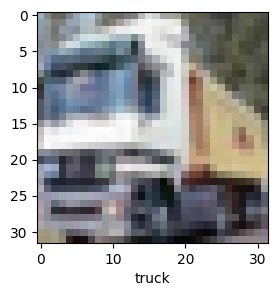

In [24]:
plot_sample(X_train,Y_train,1)

#Scaling the train and test data

In [25]:
X_train = X_train/255
X_test = X_test/255

#Training the model using Artificial Neural Networks

The loss specified here is sparse_categorical_lossentropy there is one more type of loss that is categorical_lossentropy.

The difference is that when we use one-hot encoding for classification or qualitative data like for 3 classes we use [1,0,0] or [0,1,0] or [0,0,1] then in that case we use categorical_lossentropy.

but when we use sparse values like 0,1,2,3,4,5,6,etc. then in that case we use sparse_categorical_lossentropy.

In [28]:
  ann = tf.keras.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(3000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])

ann.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

ann.fit(X_train,Y_train,epochs=5,verbose=1)

Epoch 1/5
1563/1563 [==============================] - 268s 171ms/step - loss: 1.8084 - accuracy: 0.3582
Epoch 2/5
1563/1563 [==============================] - 253s 162ms/step - loss: 1.6219 - accuracy: 0.4281
Epoch 3/5
1563/1563 [==============================] - 269s 172ms/step - loss: 1.5415 - accuracy: 0.4575
Epoch 4/5
1563/1563 [==============================] - 257s 165ms/step - loss: 1.4788 - accuracy: 0.4808
Epoch 5/5
1563/1563 [==============================] - 263s 168ms/step - loss: 1.4296 - accuracy: 0.4987


In [29]:
ann.evaluate(X_test,Y_test)

313/313 [==============================] - 13s 42ms/step - loss: 1.4413 - accuracy: 0.4898


[1.4413176774978638, 0.48980000615119934]

In [33]:
Y_pred = ann.predict(X_test)
print(Y_pred)

313/313 [==============================] - 15s 48ms/step
[[0.4459763  0.42102832 0.67885214 ... 0.05717368 0.64023536 0.08040576]
 [0.8080432  0.8621236  0.3297646  ... 0.13022286 0.93107    0.96582365]
 [0.956137   0.71651167 0.29441687 ... 0.2795043  0.9832086  0.8184461 ]
 ...
 [0.08603691 0.04235652 0.84846306 ... 0.5329055  0.21329059 0.10469425]
 [0.31003302 0.22079664 0.7581691  ... 0.3214956  0.10064917 0.18051685]
 [0.5754588  0.13345551 0.60470957 ... 0.8953375  0.20285015 0.26007813]]


In [34]:
print(Y_pred.shape)

(10000, 10)


In [36]:
Y_pred_classes = [np.argmax(element) for element in Y_pred]

In [37]:
from sklearn.metrics import classification_report
classification_report(Y_test,Y_pred_classes)

'              precision    recall  f1-score   support\n\n           0       0.48      0.64      0.55      1000\n           1       0.68      0.48      0.56      1000\n           2       0.43      0.28      0.34      1000\n           3       0.38      0.34      0.36      1000\n           4       0.42      0.41      0.42      1000\n           5       0.51      0.24      0.32      1000\n           6       0.41      0.76      0.53      1000\n           7       0.56      0.54      0.55      1000\n           8       0.58      0.65      0.61      1000\n           9       0.55      0.56      0.56      1000\n\n    accuracy                           0.49     10000\n   macro avg       0.50      0.49      0.48     10000\nweighted avg       0.50      0.49      0.48     10000\n'

Using ANNs, we are getting the accuracy of 49.87% on training data and 48.98% on test data.

So, we are moving to use CNNs.

Difference Between Sigmoid and SoftMax Activation Functions

If we have classes and their outputs are:

0.45,0.67

then Sigmoid will return them as it is

where as Softmax will do 0.45/(0.45+0.67) and 0.67/(0.45+0.67) respectively

In [42]:
#Creating CNN model
cnn = models.Sequential([

    #cnns
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D(),

    #cnns
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [43]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
cnn.fit(X_train,Y_train,epochs=10,verbose=1)

Epoch 1/10
1563/1563 [==============================] - 104s 65ms/step - loss: 1.4739 - accuracy: 0.4693
Epoch 2/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.1339 - accuracy: 0.6028
Epoch 3/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.9960 - accuracy: 0.6532
Epoch 4/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.9076 - accuracy: 0.6824
Epoch 5/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.8424 - accuracy: 0.7063
Epoch 6/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.7833 - accuracy: 0.7280
Epoch 7/10
1563/1563 [==============================] - 62s 39ms/step - loss: 0.7369 - accuracy: 0.7418
Epoch 8/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.6909 - accuracy: 0.7589
Epoch 9/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.6457 - accuracy: 0.7739
Epoch 10/10
1563/1563 [==============================] - 61s 39

In [44]:
cnn.evaluate(X_test,Y_test)

313/313 [==============================] - 6s 19ms/step - loss: 0.9348 - accuracy: 0.6960


[0.9347971677780151, 0.6959999799728394]

In [45]:
Y_pred = cnn.predict(X_test)

313/313 [==============================] - 6s 18ms/step


In [47]:
print(Y_pred)
print(Y_pred.shape)

[[2.19933772e-05 8.60215368e-05 3.33181670e-04 ... 2.59103308e-05
  1.52640209e-01 1.18248034e-04]
 [3.95369204e-03 4.85461690e-02 3.55068687e-06 ... 6.36520170e-10
  9.47306573e-01 1.86631529e-04]
 [1.39986575e-01 9.34582204e-02 3.75203323e-03 ... 7.28816085e-04
  7.33298004e-01 2.16554459e-02]
 ...
 [2.81752436e-04 2.79270421e-06 1.82268187e-01 ... 4.31129505e-04
  9.39924757e-06 5.60420267e-06]
 [3.09072193e-02 2.11976796e-01 9.80818272e-03 ... 1.25777815e-03
  6.81435980e-04 3.57334909e-04]
 [8.11240795e-07 6.07327456e-06 1.15581868e-04 ... 9.91022825e-01
  2.23855796e-08 9.07652009e-07]]
(10000, 10)


In [48]:
Y_pred_classes = [np.argmax(element) for element in Y_pred]
print(Y_pred_classes)

[3, 8, 8, 0, 6, 6, 1, 2, 3, 1, 5, 9, 3, 7, 9, 6, 5, 3, 8, 6, 7, 2, 4, 9, 4, 6, 4, 0, 9, 6, 6, 5, 4, 3, 9, 3, 7, 0, 9, 5, 0, 6, 5, 6, 0, 9, 5, 3, 7, 6, 9, 8, 6, 3, 8, 8, 7, 8, 2, 5, 7, 5, 4, 3, 6, 2, 1, 0, 5, 9, 4, 3, 8, 8, 9, 2, 0, 3, 3, 8, 8, 1, 1, 7, 2, 7, 2, 0, 8, 9, 0, 3, 8, 6, 4, 6, 6, 0, 0, 7, 4, 7, 6, 3, 1, 1, 2, 6, 8, 7, 4, 0, 2, 2, 1, 3, 0, 4, 2, 5, 8, 5, 1, 2, 8, 0, 8, 3, 3, 0, 4, 1, 8, 9, 1, 2, 9, 7, 2, 8, 3, 5, 3, 5, 8, 7, 3, 5, 5, 2, 8, 1, 6, 0, 0, 5, 3, 9, 3, 4, 2, 1, 6, 6, 2, 7, 8, 4, 5, 4, 9, 9, 9, 8, 9, 9, 3, 7, 5, 9, 0, 5, 2, 2, 0, 8, 2, 3, 3, 8, 2, 8, 0, 1, 7, 3, 8, 8, 5, 8, 3, 9, 8, 7, 1, 5, 8, 5, 7, 9, 3, 9, 2, 7, 2, 2, 7, 9, 8, 7, 7, 4, 9, 2, 3, 9, 7, 2, 3, 3, 3, 1, 3, 1, 8, 0, 4, 0, 3, 5, 1, 1, 9, 8, 0, 3, 1, 8, 3, 0, 7, 3, 9, 9, 2, 0, 3, 0, 8, 9, 8, 1, 3, 3, 0, 8, 2, 4, 7, 3, 2, 3, 6, 3, 8, 2, 0, 2, 3, 7, 9, 1, 3, 1, 9, 9, 8, 0, 7, 9, 1, 2, 6, 1, 3, 4, 6, 0, 0, 6, 6, 2, 2, 8, 2, 1, 9, 2, 1, 2, 8, 6, 8, 8, 1, 0, 7, 5, 5, 5, 3, 5, 2, 2, 5, 1, 7, 5, 4, 6, 1, 9, 3, 

In [49]:
from sklearn.metrics import classification_report
classification_report(Y_test,Y_pred_classes)

'              precision    recall  f1-score   support\n\n           0       0.75      0.71      0.73      1000\n           1       0.78      0.82      0.80      1000\n           2       0.58      0.62      0.60      1000\n           3       0.47      0.58      0.52      1000\n           4       0.69      0.61      0.65      1000\n           5       0.60      0.61      0.61      1000\n           6       0.86      0.66      0.75      1000\n           7       0.77      0.75      0.76      1000\n           8       0.76      0.85      0.80      1000\n           9       0.78      0.75      0.77      1000\n\n    accuracy                           0.70     10000\n   macro avg       0.71      0.70      0.70     10000\nweighted avg       0.71      0.70      0.70     10000\n'

So, by using CNN we are getting an accuracy of 79.5% on training data and 69.60% for test data.

#Performing Predictions using CNNs

In [54]:
#checking the predictions of the model for some random test data
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
print('Actual value: ',classes[Y_test[1]])
print('Predicted value: ',classes[Y_pred_classes[1]])

Actual value:  ship
Predicted value:  ship
